In [1]:
import torch
import numpy as np
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
from copy import deepcopy
from utils import (
    SigLIPExperiment,
)
%load_ext autoreload
%autoreload 2


# Experiments with Fixed Relative Bias

Using device: cpu
Running experiments with: n_classes=100, dim=10, n_epochs=10000
Relative biases to test: [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]

--- Starting Experiment 1/20 ---
Current Relative Bias: -1.0, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

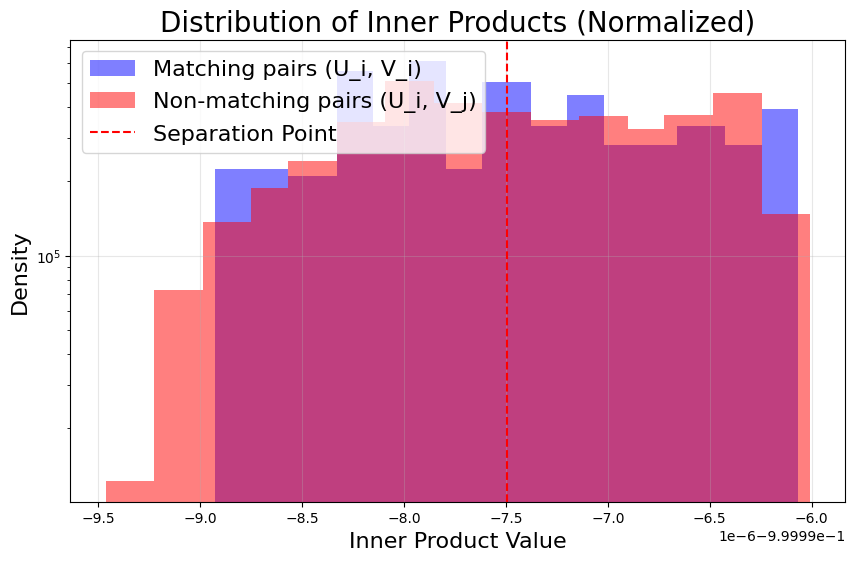


--- Starting Experiment 2/20 ---
Current Relative Bias: -0.8947368421052632, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

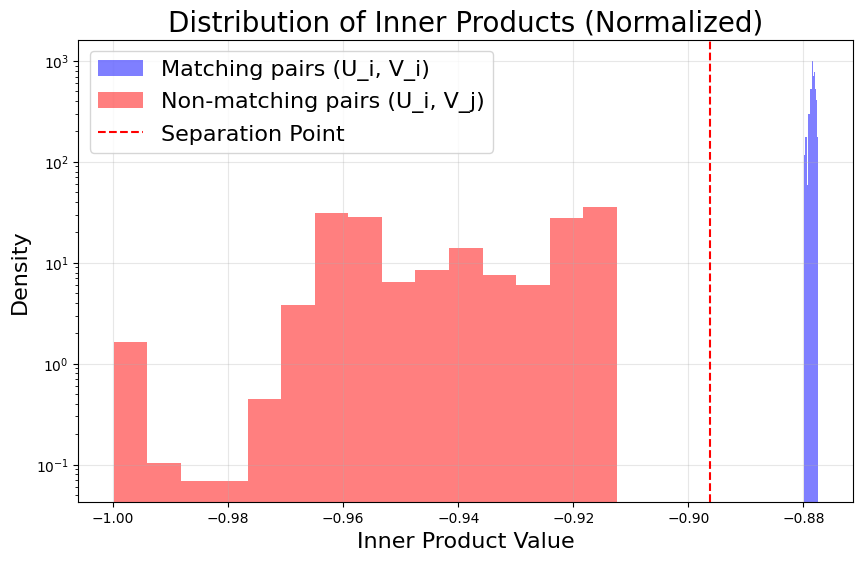


--- Starting Experiment 3/20 ---
Current Relative Bias: -0.7894736842105263, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

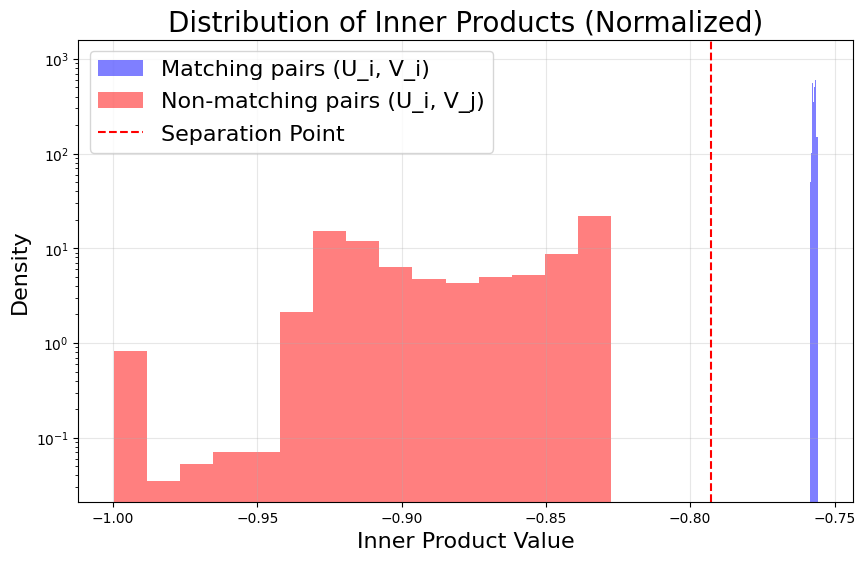


--- Starting Experiment 4/20 ---
Current Relative Bias: -0.6842105263157895, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

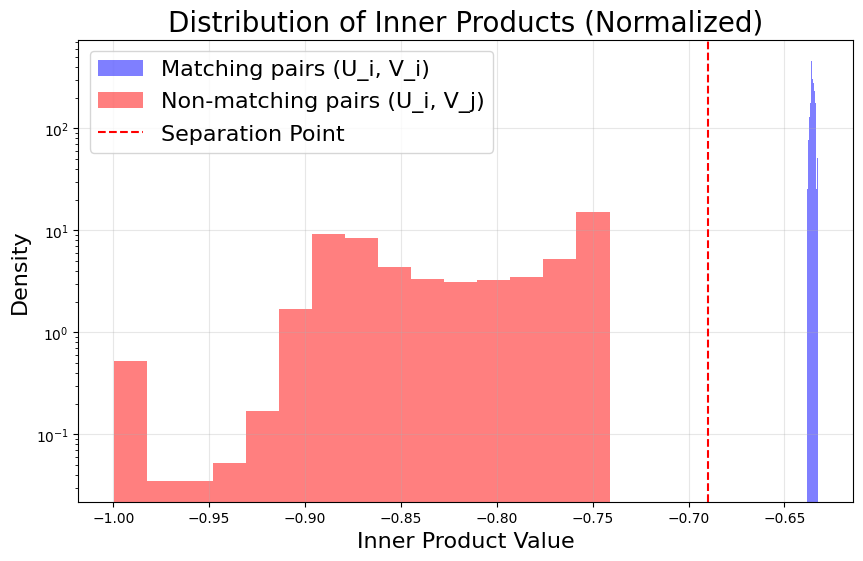


--- Starting Experiment 5/20 ---
Current Relative Bias: -0.5789473684210527, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

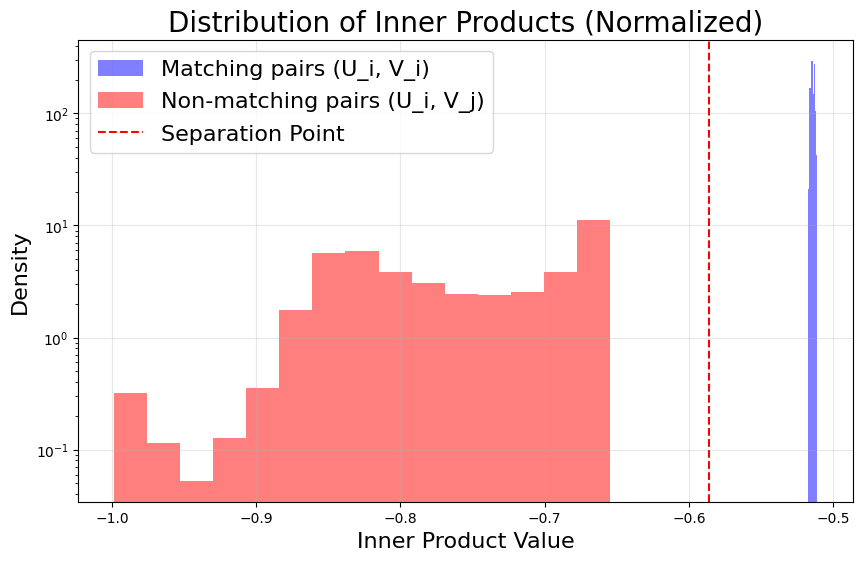


--- Starting Experiment 6/20 ---
Current Relative Bias: -0.4736842105263158, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

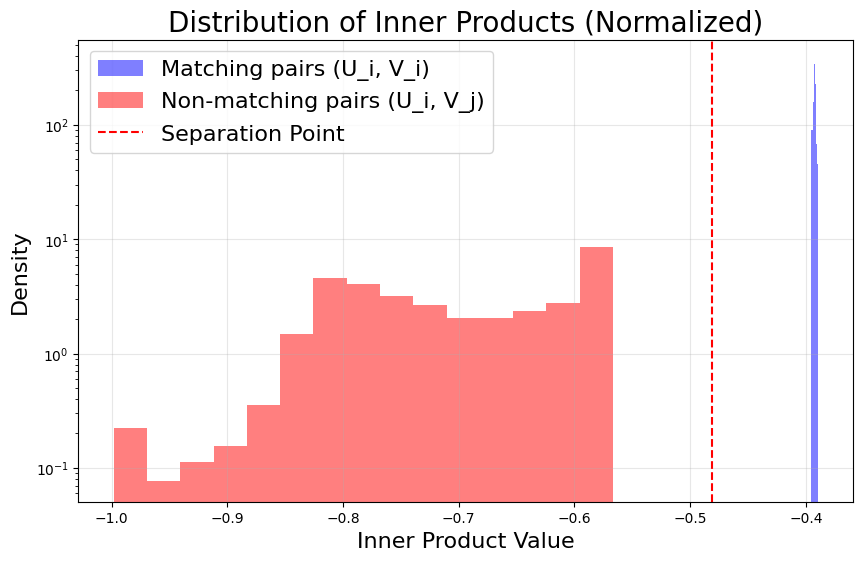


--- Starting Experiment 7/20 ---
Current Relative Bias: -0.368421052631579, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

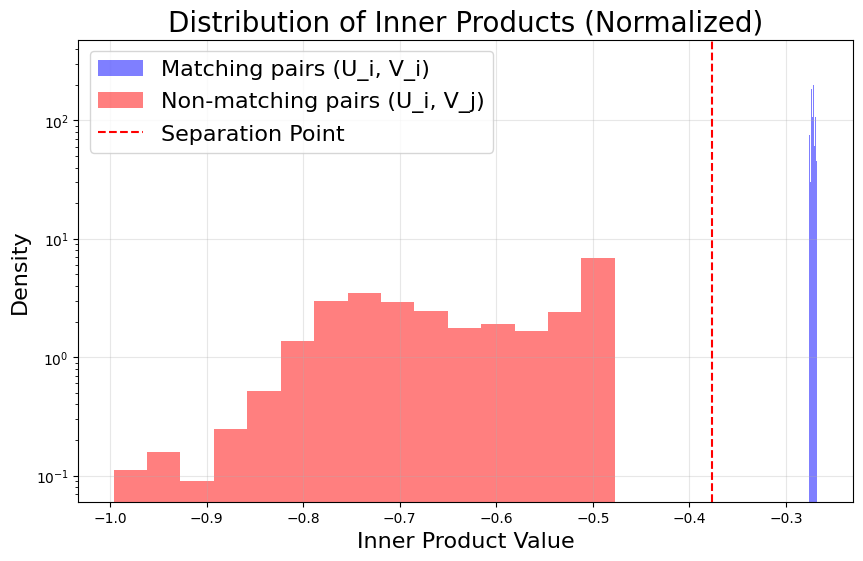


--- Starting Experiment 8/20 ---
Current Relative Bias: -0.26315789473684215, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

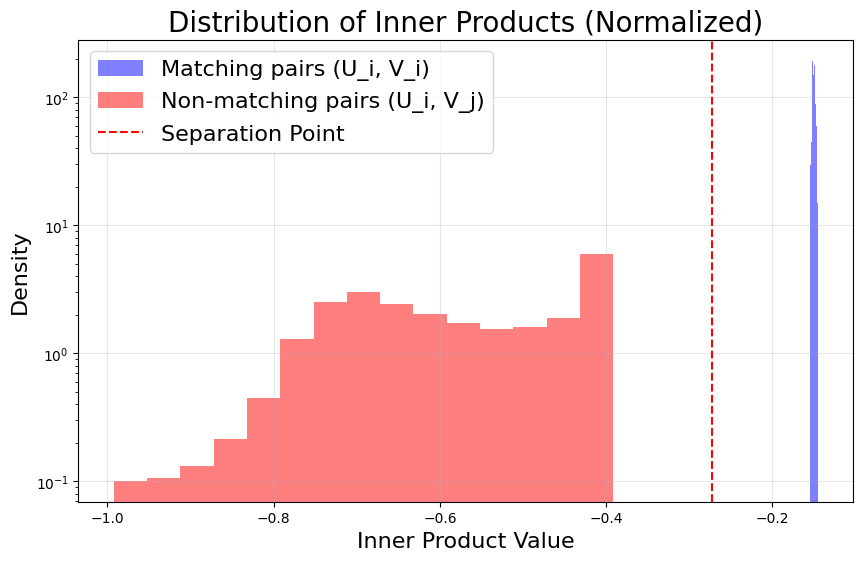


--- Starting Experiment 9/20 ---
Current Relative Bias: -0.1578947368421053, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

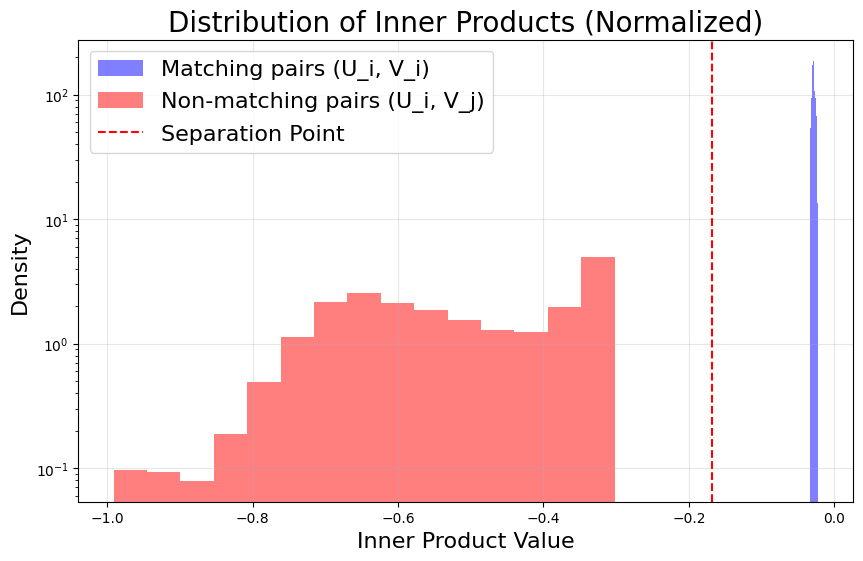


--- Starting Experiment 10/20 ---
Current Relative Bias: -0.052631578947368474, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

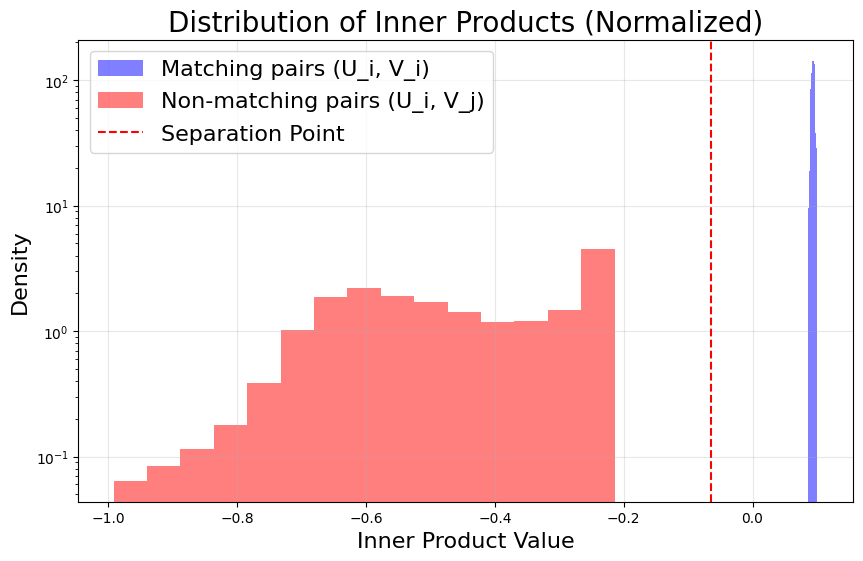


--- Starting Experiment 11/20 ---
Current Relative Bias: 0.05263157894736836, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

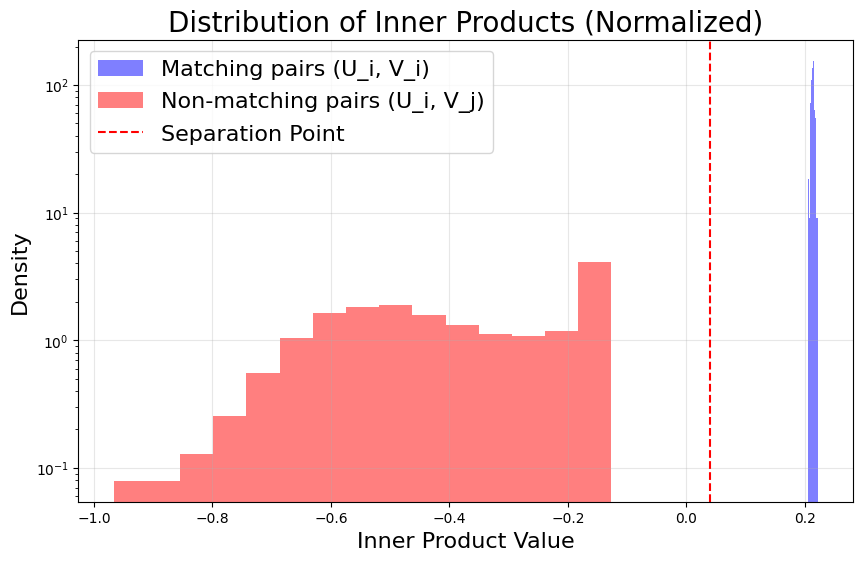


--- Starting Experiment 12/20 ---
Current Relative Bias: 0.1578947368421053, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

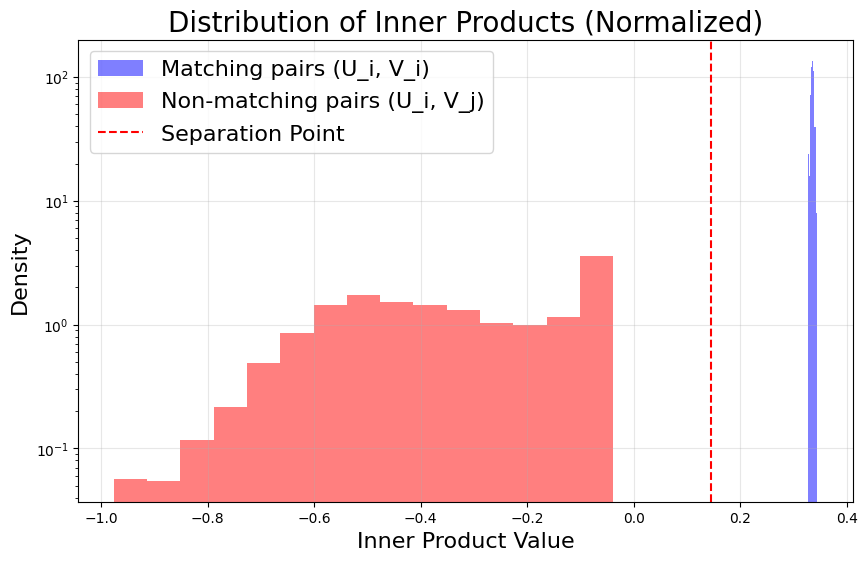


--- Starting Experiment 13/20 ---
Current Relative Bias: 0.26315789473684204, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

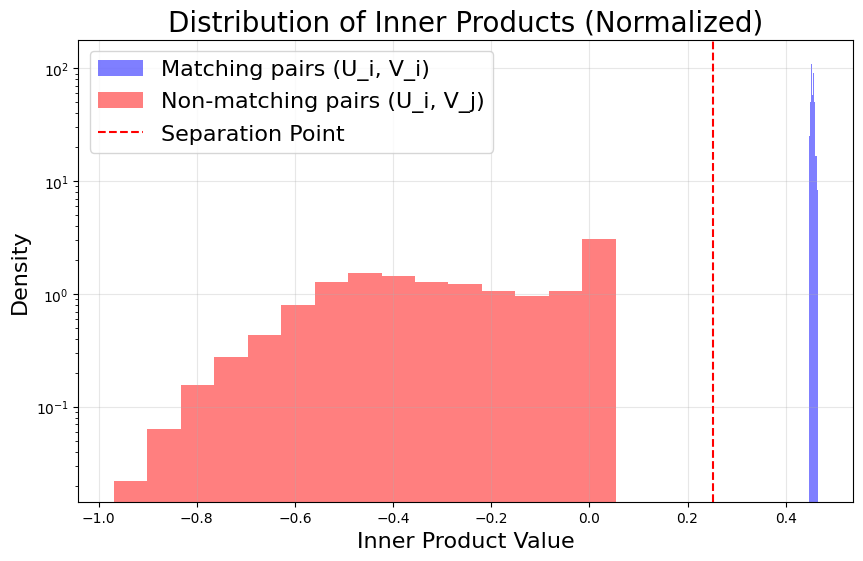


--- Starting Experiment 14/20 ---
Current Relative Bias: 0.36842105263157876, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

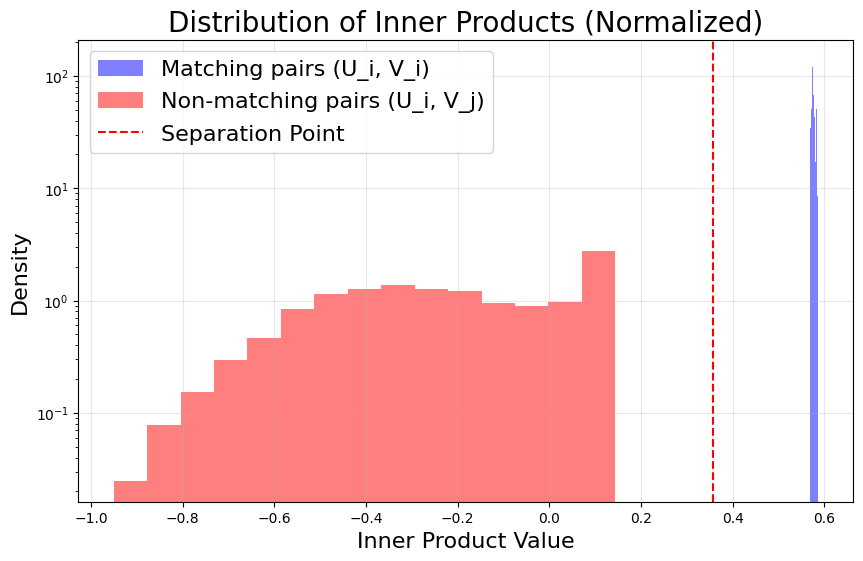


--- Starting Experiment 15/20 ---
Current Relative Bias: 0.4736842105263157, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

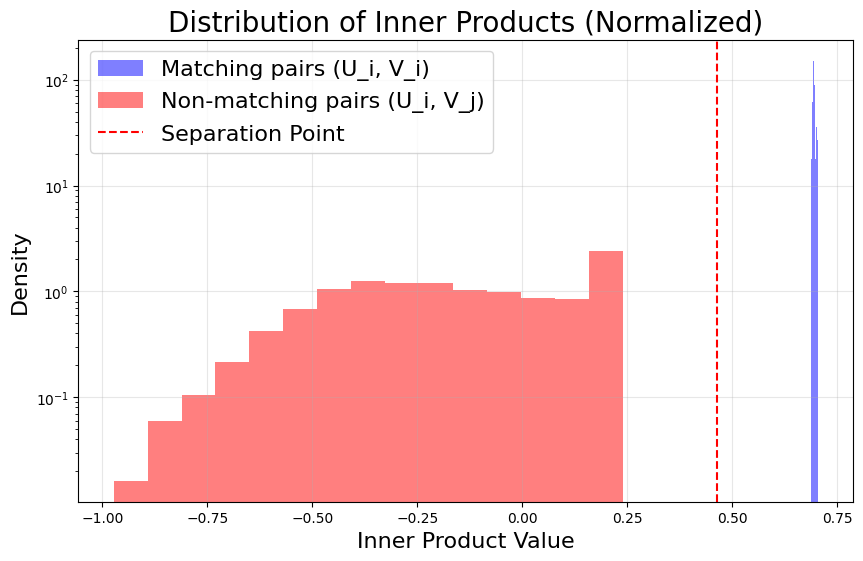


--- Starting Experiment 16/20 ---
Current Relative Bias: 0.5789473684210527, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

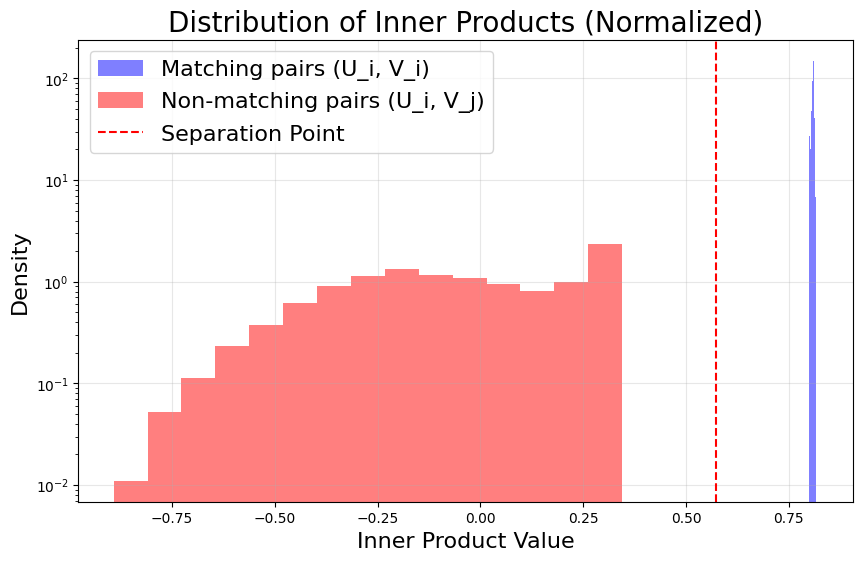


--- Starting Experiment 17/20 ---
Current Relative Bias: 0.6842105263157894, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

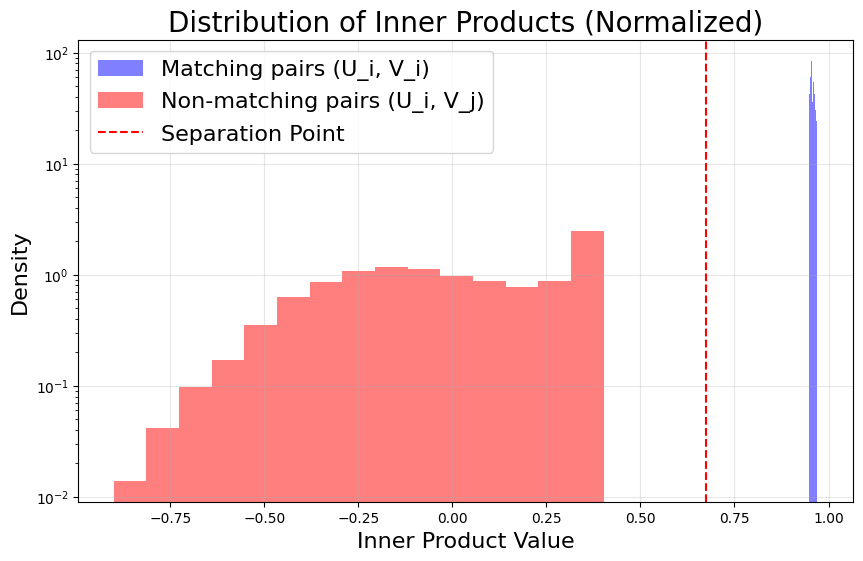


--- Starting Experiment 18/20 ---
Current Relative Bias: 0.7894736842105261, Trainable Bias: False, Temp: 10.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 1000x600 with 0 Axes>

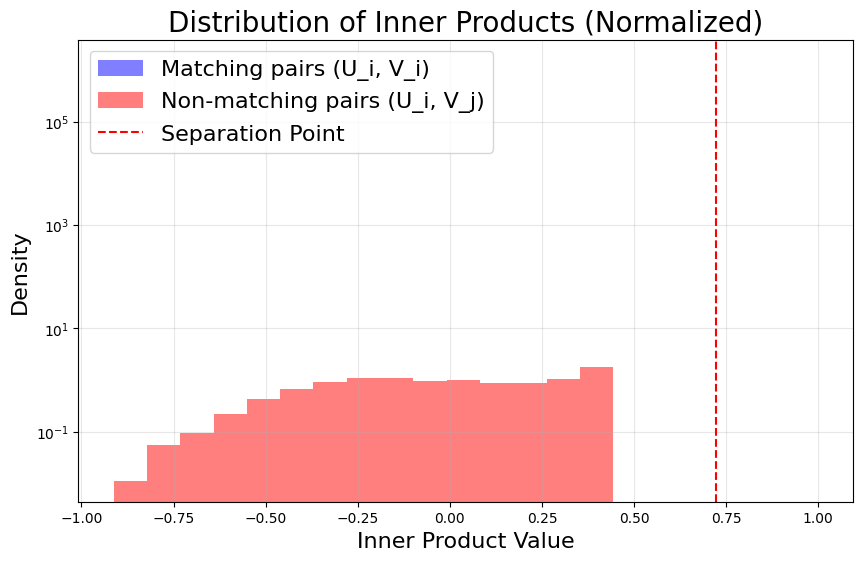


--- Starting Experiment 19/20 ---
Current Relative Bias: 0.894736842105263, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

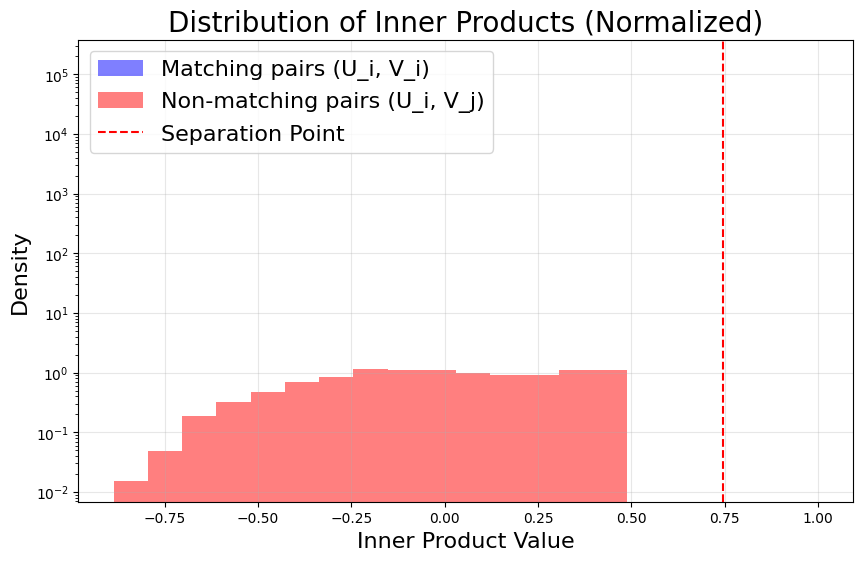


--- Starting Experiment 20/20 ---
Current Relative Bias: 1.0, Trainable Bias: False, Temp: 10.0


<Figure size 1000x600 with 0 Axes>

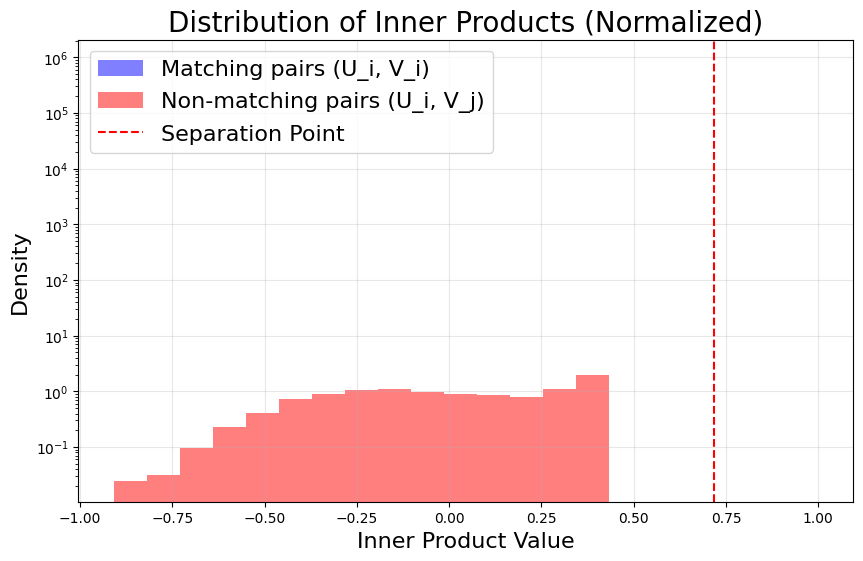


--- All Experiments Complete. Analyzing and Plotting Aggregate Results. ---


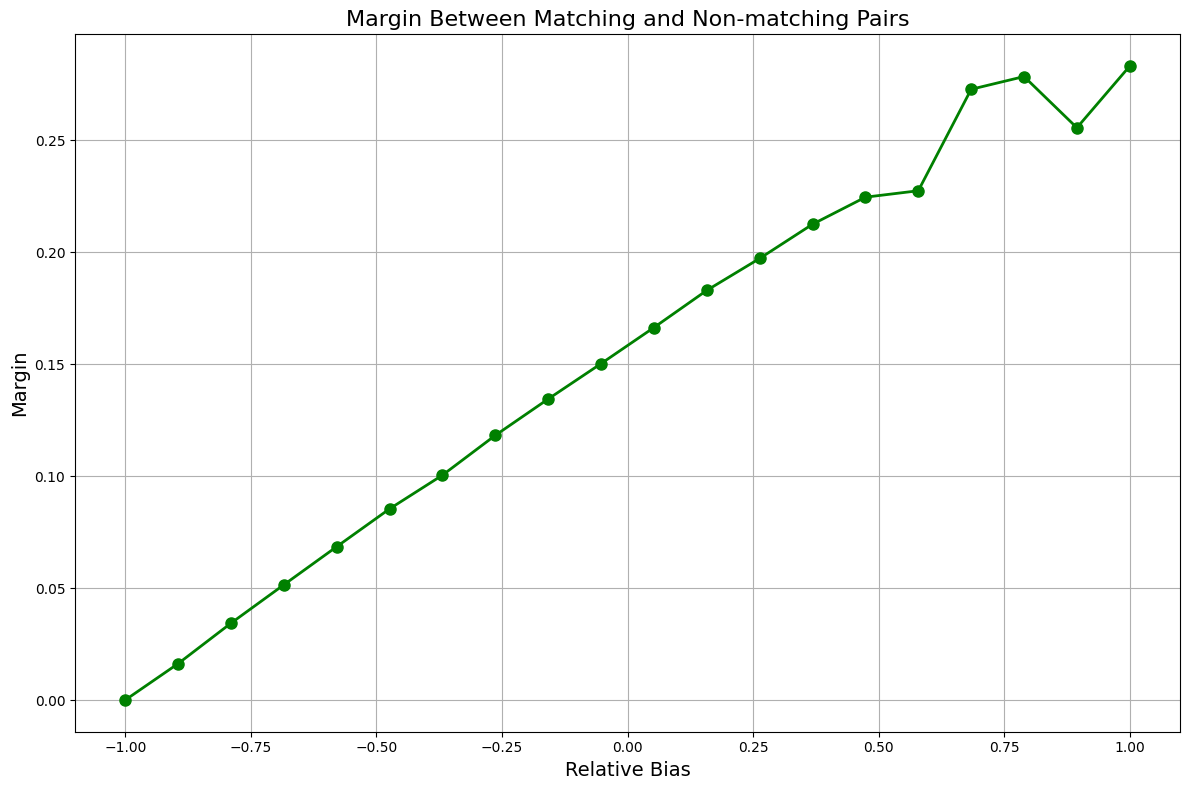

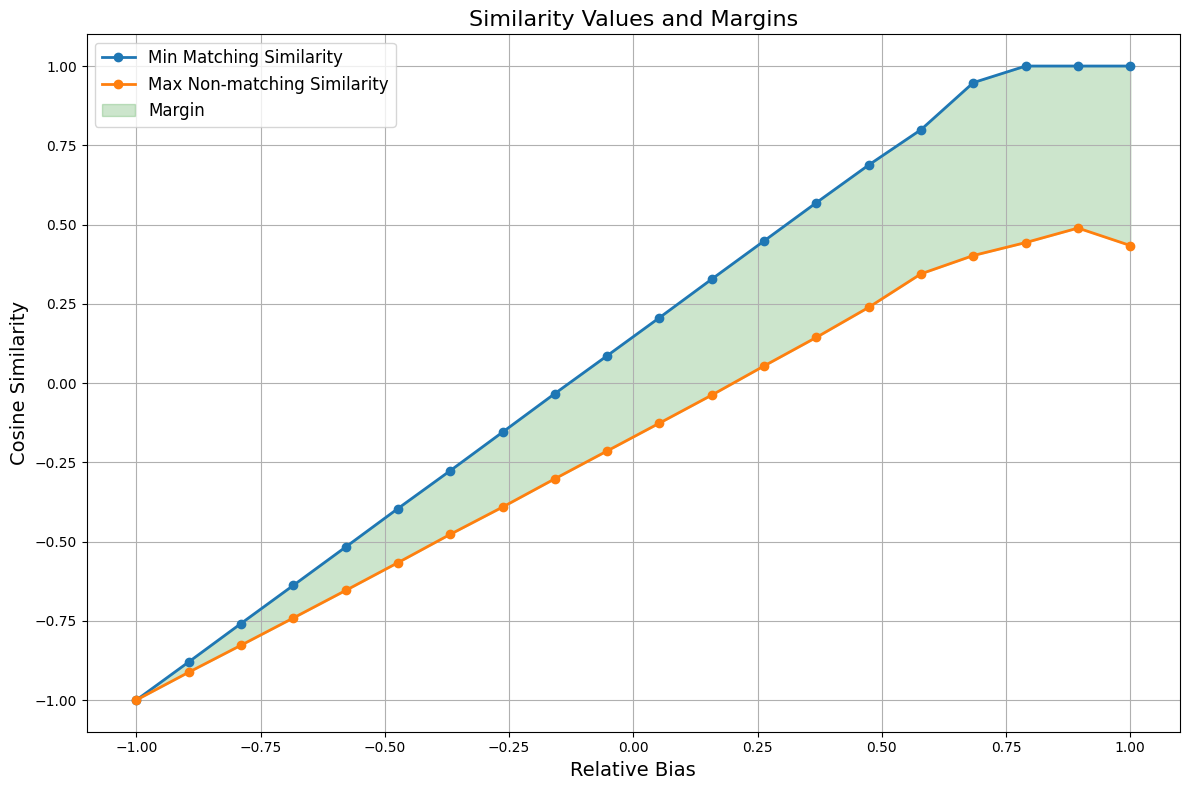


Script finished.


In [4]:
def main():
    torch.manual_seed(42)

    # Experiment parameters
    relative_biases_to_test = np.linspace(-1,1,20)
    n_classes = 100
    dim = 10
    n_epochs = int(1e4)
    initial_temperature = 10.0
    train_the_bias = False

    device_str = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device_str}")
    print(f"Running experiments with: n_classes={n_classes}, dim={dim}, n_epochs={n_epochs}")
    print(f"Relative biases to test: {relative_biases_to_test}")

    all_experiment_results_tuples = [] # To store (U, V, criterion, losses)
    for i, rb_val in enumerate(relative_biases_to_test):
        print(f"\n--- Starting Experiment {i+1}/{len(relative_biases_to_test)} ---")
        print(f"Current Relative Bias: {rb_val}, Trainable Bias: {train_the_bias}, Temp: {initial_temperature}")
        experiment_runner = SigLIPExperiment(
            n_classes=n_classes,
            dim=dim,
            n_epochs=n_epochs,
            device=device_str
        )
        U_final, V_final, criterion_final, losses_history = experiment_runner.train(
            relative_bias=rb_val,
            temperature=initial_temperature,
            trainable_bias=train_the_bias
        )
        # Plot inner product gap for current experiment
        plt.figure(figsize=(10, 6))
        experiment_runner.plot_inner_product_gap(U_final, V_final)
        plt.title(f'Inner Product Distribution (rb={rb_val:.2f})')
        plt.close()  # Close to avoid displaying individual plots
        all_experiment_results_tuples.append((deepcopy(U_final), deepcopy(V_final), deepcopy(criterion_final), losses_history))
    print("\n--- All Experiments Complete. Analyzing and Plotting Aggregate Results. ---")
    experiment_runner.analyze_results(
        all_results=all_experiment_results_tuples,
        relative_biases=relative_biases_to_test,
    )
    print("\nScript finished.")

if __name__ == "__main__":
    main()

In [ ]:
import os
import math
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from utils import SigLIPExperiment
from utils.plottingutils import calculate_margin
from copy import deepcopy


# ---- Configuration ----
relative_bias_list = np.linspace(-1, 1, 10)  # fixed rb values to compare
n_runs = 100                    # number of independent runs per rb
n_classes = 100                 # reduce for speed if needed
dim = 10                        # embedding dimension
n_epochs = 5000                # training epochs per run
lr = 1e-2                       # learning rate
temperature_init = 10.0         # initial (and trainable) temperature
trainable_temp = True           # keep True to observe scaling
device = 'cuda' if torch.cuda.is_available() else 'cpu'


# If runtime is a concern during first test, you can temporarily reduce n_runs or n_epochs.
print(f"Device: {device}")


# ---- Storage for results ----
# margins[rb_index, run_index, epoch]
margins = np.zeros((len(relative_bias_list), n_runs, n_epochs), dtype=np.float32)
# opt_rbs[rb_index, run_index, epoch]
opt_rbs = np.zeros_like(margins)


def run_single_experiment(fixed_rb: float, seed: int):
    torch.manual_seed(seed)
    # Minimal training loop to record per-epoch margin and optimal rb
    U_init = torch.randn(n_classes, dim, device=device)
    V_init = torch.randn(n_classes, dim, device=device)
    U = torch.nn.Parameter(U_init / U_init.norm(dim=1, keepdim=True))
    V = torch.nn.Parameter(V_init / V_init.norm(dim=1, keepdim=True))


    from utils.siglip_loss import SigLIPLoss
    criterion = SigLIPLoss(temperature=temperature_init, relative_bias=fixed_rb, trainable_temp=trainable_temp, trainable_bias=False, relative_bias_parameterization=True).to(device)


    optimizer = torch.optim.Adam([{'params': U, 'lr': lr}, {'params': V, 'lr': lr}, {'params': criterion.parameters(), 'lr': lr}])


    for epoch in range(n_epochs):
        optimizer.zero_grad()
        loss = criterion(U, V)
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            U.data = U.data / U.data.norm(dim=1, keepdim=True)
            V.data = V.data / V.data.norm(dim=1, keepdim=True)
            margin, min_match, max_non_match = calculate_margin(U, V)
            optimal_rb = (min_match + max_non_match) / 2.0
        yield float(margin), float(optimal_rb)


def variable_width_plot(ax, x, mean, std, color, label, min_lw=0.8, max_lw=5.0):
    # Normalize std to [0,1] for line width mapping
    s = std.copy()
    s -= s.min()
    if s.max() > 0:
        s /= s.max()
    widths = min_lw + (max_lw - min_lw) * s
    # Build segments for LineCollection
    points = np.array([x, mean]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, linewidths=widths[:-1], colors=color, alpha=0.9, label=label)
    ax.add_collection(lc)
    # Add mean ± std as light fill
    ax.fill_between(x, mean-std, mean+std, color=color, alpha=0.15)


def plot_margin_trajectories():
    epochs = np.arange(n_epochs)
    fig, ax = plt.subplots(figsize=(10,6))
    cmap = plt.get_cmap('viridis')
    for idx, rb in enumerate(relative_bias_list):
        mean_curve = margins[idx].mean(axis=0)
        std_curve = margins[idx].std(axis=0)
        color = cmap(idx / max(1, len(relative_bias_list)-1))
        variable_width_plot(ax, epochs, mean_curve, std_curve, color, label=f"rb={rb:+.2f}")
        print(f"rb={rb:+.2f} final mean margin: {mean_curve[-1]:.4f} ± {std_curve[-1]:.4f}")
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Margin')
    ax.set_title('Margin Evolution (Mean ± Std, line width ~ std)')
    ax.grid(True, alpha=0.3)
    ax.legend(frameon=False)
    plt.tight_layout()
    os.makedirs('logs', exist_ok=True)
    out_path = os.path.join('logs', 'margin_time_fixed_rb.png')
    plt.savefig(out_path, dpi=200)
    print(f"Saved figure to {out_path}")


def plot_margin_vs_optimal_rb():
    # Trajectory plot: for each rb, plot mean(opt_rb) vs mean(margin) across epochs
    cmap = plt.get_cmap('plasma')
    fig, ax = plt.subplots(figsize=(10,6))
    for idx, rb in enumerate(relative_bias_list):
        mean_margin = margins[idx].mean(axis=0)
        mean_opt_rb = opt_rbs[idx].mean(axis=0)
        ax.plot(mean_margin, mean_opt_rb, '-', alpha=0.9, label=f"rb={rb:+.2f}", color=cmap(idx / max(1, len(relative_bias_list)-1)))
        # Mark start and end
        ax.scatter(mean_margin[0], mean_opt_rb[0], color='gray', s=10)
        ax.scatter(mean_margin[-1], mean_opt_rb[-1], color='black', s=20)
    ax.set_xlabel('Margin (mean across runs)')
    ax.set_ylabel('Optimal relative bias (mean across runs)')
    ax.set_title('Mean Optimal rb vs Margin (trajectories over epochs)')
    ax.grid(True, alpha=0.3)
    ax.legend(frameon=False)
    plt.tight_layout()
    out_path = os.path.join('logs', 'margin_vs_optimal_rb_trajectory.png')
    plt.savefig(out_path, dpi=200)
    print(f"Saved figure to {out_path}")


    # Final epoch scatter for easier comparison
    fig2, ax2 = plt.subplots(figsize=(8,6))
    final_margins = margins.mean(axis=1)[:, -1]   # mean over runs -> per rb, final epoch
    final_opt_rbs = opt_rbs.mean(axis=1)[:, -1]
    ax2.scatter(final_margins, final_opt_rbs, s=60)
    for idx, rb in enumerate(relative_bias_list):
        ax2.annotate(f"rb={rb:+.2f}", (final_margins[idx], final_opt_rbs[idx]), xytext=(5,5), textcoords='offset points', fontsize=8)
    ax2.set_xlabel('Final mean margin')
    ax2.set_ylabel('Final mean optimal rb')
    ax2.set_title('Final Mean Optimal rb vs Margin (per fixed rb)')
    ax2.grid(True, alpha=0.3)
    plt.tight_layout()
    out_path2 = os.path.join('logs', 'margin_vs_optimal_rb_final.png')
    plt.savefig(out_path2, dpi=200)
    print(f"Saved figure to {out_path2}")


def compute_and_plot():
    # Run all experiments and collect trajectories
    for idx, rb in enumerate(relative_bias_list):
        print(f"Running rb={rb} ({idx+1}/{len(relative_bias_list)})")
        for r in range(n_runs):
            for e, (margin, opt_rb) in enumerate(run_single_experiment(rb, seed= 10_000*idx + r)):
                margins[idx, r, e] = margin
                opt_rbs[idx, r, e] = opt_rb
    # Plot results
    plot_margin_trajectories()
    plot_margin_vs_optimal_rb()


    # Final metrics table (printed and saved as CSV)
    final_mean_margins = margins.mean(axis=1)[:, -1]
    final_mean_opt_rbs = opt_rbs.mean(axis=1)[:, -1]
    print("\nFinal mean metrics per fixed rb:")
    for idx, rb in enumerate(relative_bias_list):
        print(f"  rb={rb:+.3f}  mean_margin={final_mean_margins[idx]:.6f}  mean_opt_rb={final_mean_opt_rbs[idx]:.6f}")
    os.makedirs('logs', exist_ok=True)
    csv_path = os.path.join('logs', 'final_mean_margin_opt_rb.csv')
    header = 'rb,final_mean_margin,final_mean_opt_rb'
    data = np.stack([np.asarray(relative_bias_list, dtype=float), final_mean_margins, final_mean_opt_rbs], axis=1)
    np.savetxt(csv_path, data, delimiter=',', header=header, comments='')
    print(f"Saved final metrics to {csv_path}")


    return final_mean_margins, final_mean_opt_rbs


final_mean_margins, final_mean_opt_rbs = compute_and_plot()

Device: cpu
Running rb=-1.0 (1/10)
Running rb=-0.7777777777777778 (2/10)
Running rb=-0.7777777777777778 (2/10)
Running rb=-0.5555555555555556 (3/10)
Running rb=-0.5555555555555556 (3/10)
Running rb=-0.33333333333333337 (4/10)
Running rb=-0.33333333333333337 (4/10)


### Margin Evolution Across Time for Fixed Relative Bias Values

We study how the alignment *margin* evolves during training when the relative bias $r_b$ is **fixed** to several values. For each chosen $r_b$ we:

1. Run `n_runs` independent trainings (different random seeds / initial spherical embeddings).
2. At every epoch record the margin $(\min_i s_{ii} - \max_{i\neq j} s_{ij})/2$.
3. Aggregate across runs to compute the mean and standard deviation of the margin trajectory.
4. Plot the mean margin over epochs with a *variable line width* proportional to local standard deviation (thicker = more variability). We also optionally add a light band for mean ± 1 std.

This allows visual comparison of convergence speed and stability for different fixed $r_b$ values.

Adjustable parameters in the next cell:
- `relative_bias_list`
- `n_runs`
- `n_epochs`
- `n_classes`, `dim`, `lr`

Output: figure `margin_time_fixed_rb.png` saved to `logs/`.
